In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from datetime import timedelta, datetime
from vega_datasets import data
import warnings
warnings.filterwarnings("ignore")
df = data.sf_temps()

## SF Temps Database
1.) Resample by the day and take the average temperature. Visualize the average temperature over time.

2.) Write the code necessary to visualize the minimum temperature over time.

3.) Write the code necessary to visualize the maximum temperature over time.

4.) Which month is the coldest, on average?

5.) Which month has the highest average temperature?

6.) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    Use this resampled dataframe to calculate the change in temperature for the day. 
    Which month has the highest daily temperature variability?


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [2]:
# Preview data to see each row respresents an hour. 
df.head(15)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
5,45.8,2010-01-01 05:00:00
6,45.9,2010-01-01 06:00:00
7,45.9,2010-01-01 07:00:00
8,46.4,2010-01-01 08:00:00
9,48.0,2010-01-01 09:00:00


In [3]:
df.shape

(8759, 2)

In [4]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

1.) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
df = df.set_index('date').sort_index()

In [6]:
daily_avg_temp = df.resample('D').mean()

Text(0.5, 1.0, 'Average Daily Temperature')

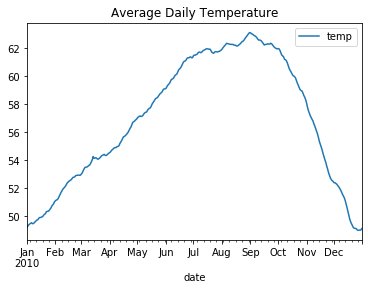

In [7]:
daily_avg_temp.plot().set_title('Average Daily Temperature')

2.) Write the code necessary to visualize the minimum temperature over time.

In [8]:
daily_min_temp = df.resample('D').min()

Text(0.5, 1.0, 'Minimum Daily Temperature')

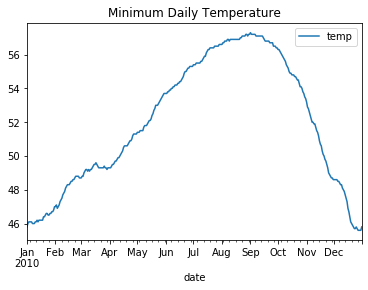

In [9]:
daily_min_temp.plot().set_title('Minimum Daily Temperature')

3.) Write the code necessary to visualize the maximum temperature over time.

In [10]:
daily_max_temp = df.resample('D').max()

Text(0.5, 1.0, 'Maximum Daily Temperature')

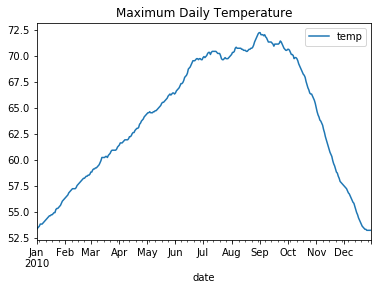

In [11]:
daily_max_temp.plot().set_title('Maximum Daily Temperature')

4.) Which month is the coldest, on average?

In [12]:
monthly_avg_temp = df.resample('M').mean()
monthly_avg_temp

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [13]:
monthly_avg_temp.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

5.) Which month has the highest average temperature?

In [14]:
monthly_avg_temp.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

6.) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    Use this resampled dataframe to calculate the change in temperature for the day. 
    Which month has the highest daily temperature variability?

In [15]:
daily_avg_temp = df.resample('D').agg(['min','max'])
daily_avg_temp.head(3)

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5

In [16]:
daily_avg_temp.columns = [p1 + '_' + p2 for p1, p2 in daily_avg_temp.columns]

In [17]:
daily_avg_temp.head()

,temp_min,temp_max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [18]:
daily_avg_temp['daily_difference'] = daily_avg_temp['temp_max'] - daily_avg_temp['temp_min']

In [19]:
daily_avg_temp.head(3)

,temp_min,temp_max,daily_difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4


In [20]:
monthly_diff = daily_avg_temp.resample('M').daily_difference.mean()

In [21]:
monthly_diff

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: daily_difference, dtype: float64

In [22]:
monthly_diff.max()

14.40333333333333

In [23]:
monthly_diff.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [24]:
daily_temp = df.resample('D').agg(['min','max','mean'])

In [25]:
daily_temp.head()

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667

In [26]:
daily_temp.columns = [p1 + '_' + p2 for p1, p2 in daily_temp.columns]

In [27]:
daily_temp.head()

,temp_min,temp_max,temp_mean
date,,,
2010-01-01,45.8,53.3,49.170833
2010-01-02,46.0,53.4,49.304167
2010-01-03,46.1,53.5,49.391667
2010-01-04,46.1,53.6,49.445833
2010-01-05,46.1,53.8,49.491667


Text(0.5, 1.0, 'Daily Temperatures')

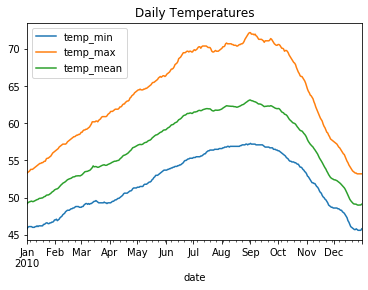

In [28]:
daily_temp.plot().set_title('Daily Temperatures')

## Seattle Weather Database


- 1.) Which year and month combination has the highest amount of precipitation?


- 2.) Visualize the amount of monthly precipitation over time.


- 3.) Visualize the amount of wind over time. Choose a time interval you think is appropriate.


- 4.) Which year-month combination is the windiest?


- 5.) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


- 6.) In which month does it rain the most?


- 7.) Which month has the most number of days with a non-zero amount of precipitation?


In [29]:
df = data.seattle_weather()

In [30]:
df.shape

(1461, 6)

In [31]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [32]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [33]:
df = df.sort_values('date').set_index('date')

In [34]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


- 1.) Which year and month combination has the highest amount of precipitation?

In [35]:
monthly_precip = df.resample('M').precipitation.sum()

In [36]:
monthly_precip.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

- 2.) Visualize the amount of monthly precipitation over time.

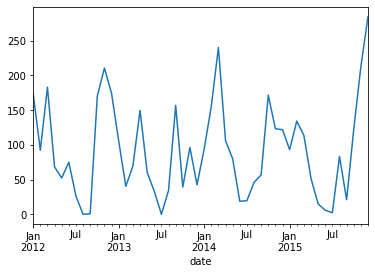

In [37]:
monthly_precip.plot()

- 3.) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [38]:
weekly_wind = df.resample('W').wind.sum()

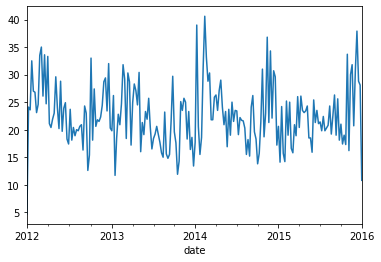

In [39]:
weekly_wind.plot()

- 4.) Which year-month combination is the windiest?

In [40]:
monthly_wind = df.resample('M').wind.mean()

In [41]:
monthly_wind.idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

- 5.) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [42]:
df['sunny_day'] = df['weather'] == 'sun'

In [43]:
annual_sun = df.resample('Y').sunny_day.sum()

In [44]:
annual_sun.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

- 6a.) In which month does it rain the most? ( By volume by month/year)

In [45]:
monthly_rain = df.resample('M').precipitation.sum()

In [46]:
# December 2015 received more rain than any other month/year
monthly_rain.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

- 6b.) In which month does it rain the most? ( By volume by overall month)

In [47]:
monthly_totals = df.groupby(df.index.month).sum()

In [48]:
monthly_totals

,precipitation,temp_max,temp_min,wind,sunny_day
date,,,,,
1,466.0,1020.4,334.4,389.2,33.0
2,422.0,1114.2,458.2,427.9,30.0
3,606.2,1536.0,602.5,443.9,42.0
4,375.4,1802.4,763.5,422.9,61.0
5,207.5,2392.7,1192.2,386.9,82.0
6,132.9,2688.0,1469.3,375.7,85.0
7,48.2,3223.8,1760.5,361.0,89.0
8,163.7,3237.9,1831.4,341.1,94.0
9,235.5,2630.9,1483.0,355.6,71.0


In [49]:
# November received more rain than any other month.
monthly_totals.precipitation.idxmax()

11

7.) Which month has the most number of days with a non-zero amount of precipitation?

In [50]:
df['precipitation_present'] = df['precipitation'] > 0

In [51]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,precipitation_present
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [52]:
monthly_totals = df.groupby(df.index.month).sum()

In [53]:
monthly_totals

,precipitation,temp_max,temp_min,wind,sunny_day,precipitation_present
date,,,,,,
1,466.0,1020.4,334.4,389.2,33.0,66.0
2,422.0,1114.2,458.2,427.9,30.0,73.0
3,606.2,1536.0,602.5,443.9,42.0,73.0
4,375.4,1802.4,763.5,422.9,61.0,59.0
5,207.5,2392.7,1192.2,386.9,82.0,34.0
6,132.9,2688.0,1469.3,375.7,85.0,37.0
7,48.2,3223.8,1760.5,361.0,89.0,11.0
8,163.7,3237.9,1831.4,341.1,94.0,22.0
9,235.5,2630.9,1483.0,355.6,71.0,35.0


In [54]:
# December has the most days with non-zero precipitation
monthly_totals.precipitation_present.idxmax()

12

## Flights Database

- 1.) Convert any negative delays to 0.


- 2.) Which hour of the day has the highest average delay?


- 3.) Does the day of the week make a difference in the delay amount?


- 4.) Does the month make a difference in the delay amount?

In [55]:
flights = data.flights_20k()

In [56]:
flights.shape

(20000, 5)

In [57]:
flights.dtypes

date           datetime64[ns]
delay                   int64
destination            object
distance                int64
origin                 object
dtype: object

In [58]:
df = flights.sort_values('date').set_index('date')

In [59]:
df.head()

,delay,destination,distance,origin
date,,,,
2001-01-01 00:01:00,14,MDW,405,MCI
2001-01-01 06:20:00,0,MCI,491,BNA
2001-01-01 06:30:00,-8,STL,251,MDW
2001-01-01 07:00:00,-10,ONT,361,OAK
2001-01-01 07:00:00,0,HOU,303,MSY


- 1.) Convert any negative delays to 0.

In [60]:
df[df['delay'] < 0] = 0

In [61]:
df.head()

,delay,destination,distance,origin
date,,,,
2001-01-01 00:01:00,14,MDW,405,MCI
2001-01-01 06:20:00,0,MCI,491,BNA
2001-01-01 06:30:00,0,0,0,0
2001-01-01 07:00:00,0,0,0,0
2001-01-01 07:00:00,0,HOU,303,MSY


- 2.) Which hour of the day has the highest average delay?

In [62]:
hourly_totals = df.groupby(df.index.hour).mean()

In [63]:
hourly_totals.delay.idxmax()

3

- 3.) Does the day of the week make a difference in the delay amount?

In [64]:
daily_averages = df.groupby(df.index.weekday).mean()

In [65]:
# Yes, Friday has the highest average delay
daily_averages.delay

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

- 4.) Does the month make a difference in the delay amount?

In [66]:
monthly_averages = df.groupby(df.index.month).mean()

In [67]:
# Not really. Delays are pretty consistent across month. If anything, March has a slightly lower delay average
monthly_averages.delay

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

## Iowa Electricity Database

- 1.) For each row, calculate the percentage of the year's total that energy source provided.


- 2.) Lineplot of generation over time, color by source


- 3.) Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


- 4.) Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


- 5.) Is the total generation increasing over time?


- 6.) How would you control for increasing consumption over time when considering how much energy is coming from each source?


- 7.) Express each number as a % of the year's total

In [68]:
power = data.iowa_electricity()

In [69]:
power.shape

(51, 3)

In [70]:
power.dtypes

year              datetime64[ns]
source                    object
net_generation             int64
dtype: object

In [71]:
power.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


- 1.) For each row, calculate the percentage of the year's total that energy source provided.

In [72]:
df = power.sort_values('year').set_index('year')

In [73]:
pivot_1 = df.pivot_table('net_generation', 'year', 'source')
# pivot_1['total_annual_generation'] = ['Fossil Fuels'] + ['Nuclear Energy'] + ['Renewables']
pivot_1.head()

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724


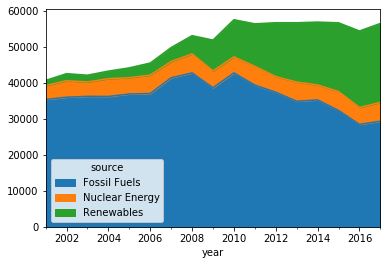

In [74]:
pivot_1.plot.area()

- 2.) Lineplot of generation over time, color by source

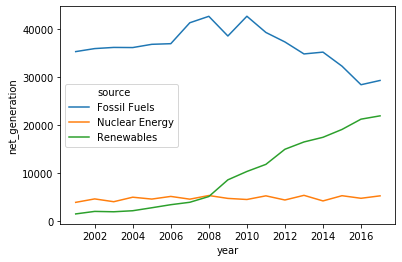

In [75]:
sns.lineplot( x= df.index, y= 'net_generation', hue = 'source', data = df)

- 3.) Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [76]:
pivot = pd.pivot_table(data=df, index = 'source', columns = df.index)
pivot

net_generation                                              \
year               2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                      
Fossil Fuels            35361      35991      36234      36205      36883   
Nuclear Energy           3853       4574       3988       4929       4538   
Renewables               1437       1963       1885       2102       2724   

                                                                       \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01   
source                                                                  
Fossil Fuels        37014      41389      42734      38620      42750   
Nuclear Energy       5095       4519       5282       4679       4451   
Renewables           3364       3870       5070       8560      10308   

                                                                       \
year           2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01   
source                                                                  
Fossil Fuels        39361      37379      34873      35250      32319   
Nuclear Energy       5215       4347       5321       4152       5243   
Renewables          11795      14949      16476      17452      19091   

                                      
year           2016-01-01 2017-01-01  
source                                
Fossil Fuels        28437      29329  
Nuclear Energy       4703       5214  
Renewables          21241      21933

- 4.) Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [77]:
# sns.lineplot( data = pivot)

## SF Temps Database Part 2


- 1.) Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)


- 2.) How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


- 3.) Create pretty labels for time plots


- 4.) Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [78]:
sf = data.sf_temps()

In [79]:
sf.shape

(8759, 2)

In [80]:
sf.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [81]:
sf.dtypes

temp           float64
date    datetime64[ns]
dtype: object

- 1.) Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [82]:
sf = sf.sort_values('date').set_index('date')

In [83]:
sf.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [84]:
sf['category'] = pd.qcut(sf.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])

In [85]:
sf.head()

,temp,category
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold
2010-01-01 03:00:00,46.5,cold
2010-01-01 04:00:00,46.0,cold


- 2.) How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.